## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

### Different MOMENTUM

In [6]:
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.3, 0.6, 0.9, 0.99]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mm in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (mm))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mm)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mm-%s" % str(mm)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.300000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.9642 - acc: 0.2974 - val_loss: 1.8788 - val_acc: 0.3281
Epoch 2/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.7907 - acc: 0.3669 - val_loss: 1.7587 - val_acc: 0.3769
Epoch 3/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.7132 - acc: 0.3960 - val_loss: 1.7932 - val_acc: 0.3510
Epoch 4/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6644 - acc: 0.4128 - val_loss: 1.6444 - val_acc: 0.4173
Epoch 5/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6197 - acc: 0.4300 - val_loss: 1.6348 - val_acc: 0.4172
Epoch 6/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.5822 - acc: 0.4405 - val_loss: 1.6617 - val_acc: 0.4124
Epoch 7/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.5556 - acc: 0.4511 - val_loss: 1.6264 - val_ac

50000/50000 [==============================] - 4s 84us/step - loss: 1.6370 - acc: 0.4208 - val_loss: 1.7910 - val_acc: 0.3646
Epoch 3/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5524 - acc: 0.4503 - val_loss: 1.5477 - val_acc: 0.4409
Epoch 4/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.4895 - acc: 0.4718 - val_loss: 1.5987 - val_acc: 0.4306
Epoch 5/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.4406 - acc: 0.4883 - val_loss: 1.5223 - val_acc: 0.4625
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.3969 - acc: 0.5053 - val_loss: 1.4641 - val_acc: 0.4769
Epoch 7/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.3567 - acc: 0.5189 - val_loss: 1.5492 - val_acc: 0.4616
Epoch 8/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.3261 - acc: 0.5318 - val_loss: 1.4816 - val_acc: 0.4658
Epoch 9/50
50000/50000 [=========================

50000/50000 [==============================] - 5s 97us/step - loss: 1.5128 - acc: 0.4612 - val_loss: 1.5194 - val_acc: 0.4674
Epoch 4/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.4681 - acc: 0.4779 - val_loss: 1.5033 - val_acc: 0.4705
Epoch 5/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4425 - acc: 0.4849 - val_loss: 1.5142 - val_acc: 0.4646
Epoch 6/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.3996 - acc: 0.5030 - val_loss: 1.4453 - val_acc: 0.4900
Epoch 7/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.3624 - acc: 0.5140 - val_loss: 1.4426 - val_acc: 0.4878
Epoch 8/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.3311 - acc: 0.5237 - val_loss: 1.4255 - val_acc: 0.5028
Epoch 9/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.3008 - acc: 0.5343 - val_loss: 1.4687 - val_acc: 0.4863
Epoch 10/50
50000/50000 [===========================

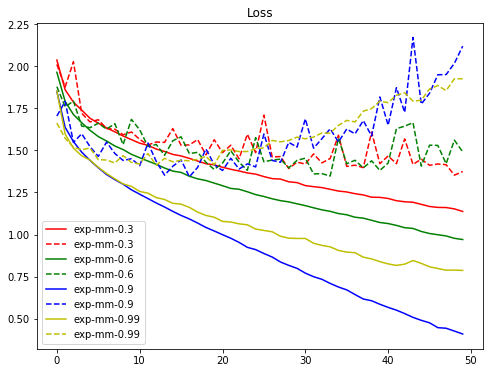

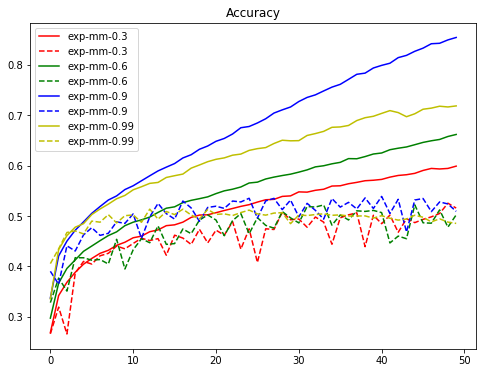

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### nesterov = false

Experiment with MOMENTUM = 0.300000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.9588 - acc: 0.3011 - val_loss: 1.8497 - val_acc: 0.3433
Epoch 2/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.7763 - acc: 0.3731 - val_loss: 1.8258 - val_acc: 0.3454
Epoch 3/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.7023 - acc: 0.3991 - val_loss: 1.6970 - val_acc: 0.3888
Epoch 4/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.6445 - acc: 0.4212 - val_loss: 1.6332 - val_acc: 0.4279
Epoch 5/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.6056 - acc: 0.4330 - val_loss: 1.6356 - val_acc: 0.4193
Epoch 6/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.5718 - acc: 0.4458 - val_loss: 1.6140 - val_acc: 0.4341
Epoch 7/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5357 - acc: 0.4589 - val_loss: 1.5538 - val_acc

50000/50000 [==============================] - 4s 88us/step - loss: 1.6633 - acc: 0.4077 - val_loss: 1.6160 - val_acc: 0.4226
Epoch 3/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.5880 - acc: 0.4354 - val_loss: 1.5558 - val_acc: 0.4468
Epoch 4/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5185 - acc: 0.4620 - val_loss: 1.5256 - val_acc: 0.4562
Epoch 5/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4803 - acc: 0.4729 - val_loss: 1.4775 - val_acc: 0.4724
Epoch 6/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.4374 - acc: 0.4880 - val_loss: 1.4515 - val_acc: 0.4785
Epoch 7/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.4043 - acc: 0.5010 - val_loss: 1.4586 - val_acc: 0.4833
Epoch 8/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.3772 - acc: 0.5096 - val_loss: 1.4752 - val_acc: 0.4778
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 4s 83us/step - loss: 1.6705 - acc: 0.3970 - val_loss: 1.6422 - val_acc: 0.4169
Epoch 4/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6439 - acc: 0.4103 - val_loss: 1.6736 - val_acc: 0.4008
Epoch 5/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.6508 - acc: 0.4074 - val_loss: 1.6497 - val_acc: 0.4166
Epoch 6/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.6344 - acc: 0.4145 - val_loss: 1.6476 - val_acc: 0.4085
Epoch 7/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6054 - acc: 0.4248 - val_loss: 1.6270 - val_acc: 0.4231
Epoch 8/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5946 - acc: 0.4275 - val_loss: 1.6235 - val_acc: 0.4230
Epoch 9/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5991 - acc: 0.4256 - val_loss: 1.6002 - val_acc: 0.4347
Epoch 10/50
50000/50000 [===========================

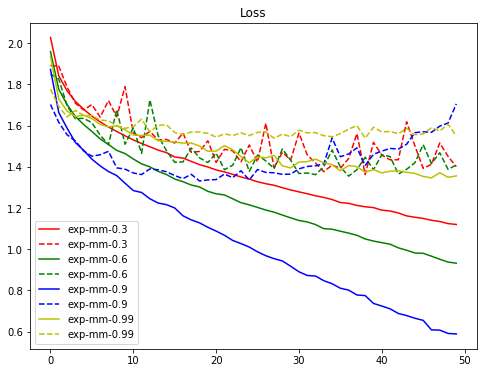

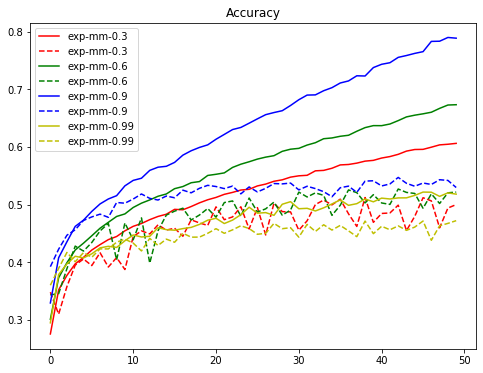

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mm in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (mm))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=mm)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mm-%s" % str(mm)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
